In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [ ]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [ ]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

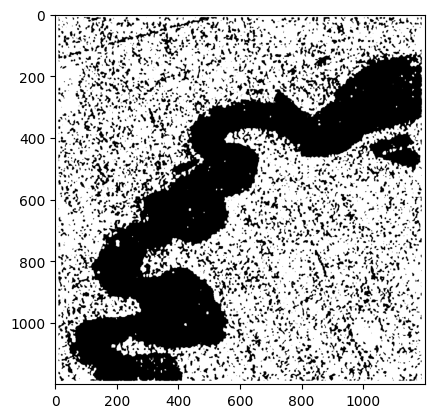

In [36]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [37]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

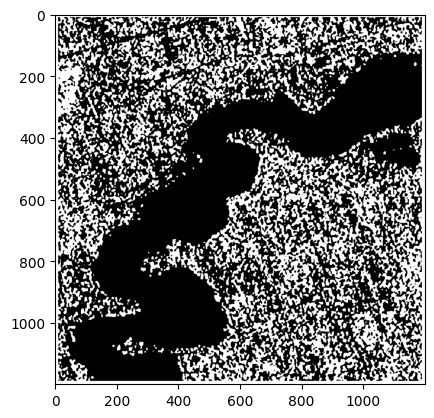

In [38]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [39]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


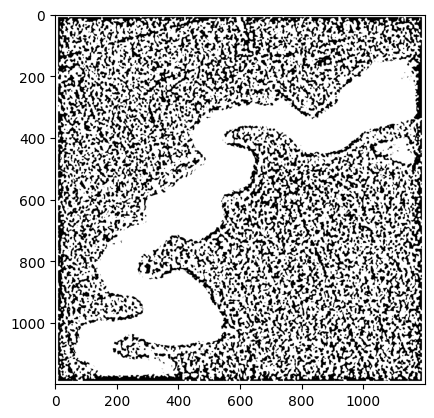

In [40]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [41]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

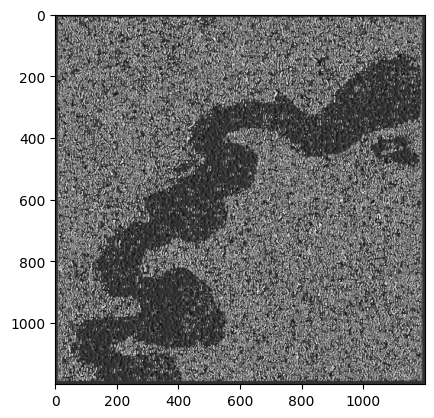

In [42]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

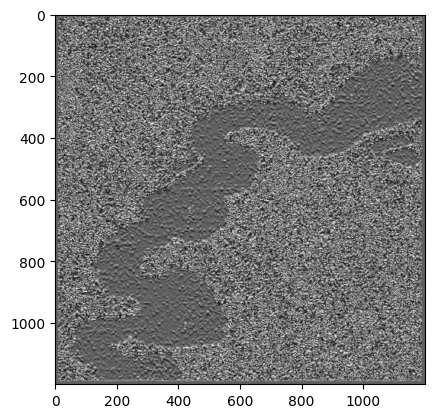

In [43]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [44]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

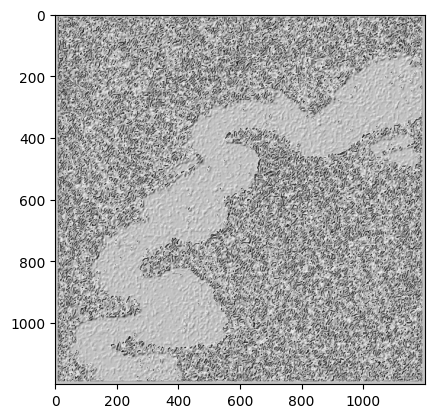

In [45]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [46]:
edges = cv2.Canny(image_gray,100,200)

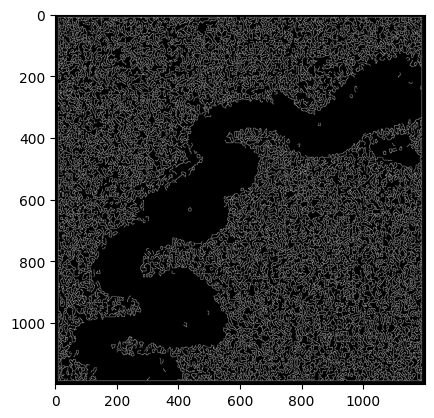

In [47]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [48]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

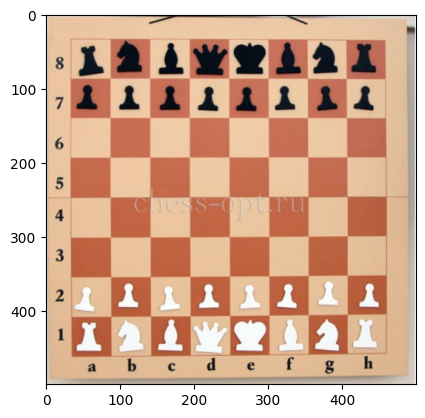

In [49]:
plt.imshow(image)

In [50]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [51]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [52]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

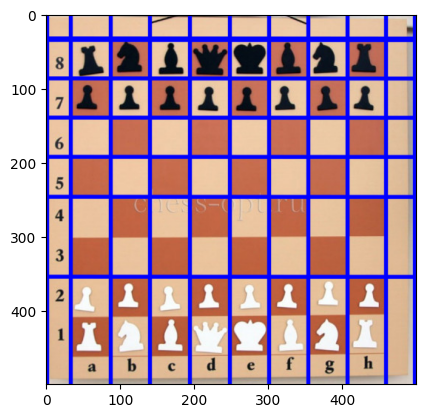

In [53]:
plt.imshow(image)

In [54]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

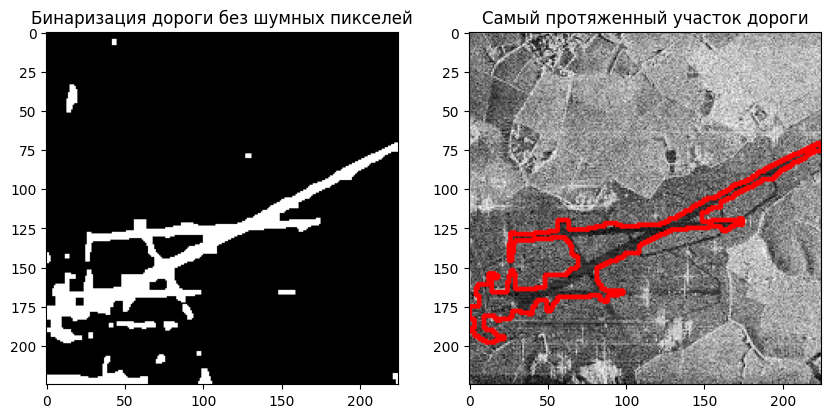

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Загружаем изображение
image = cv2.imread('sar_3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Размытие для подавления шума
blur = cv2.GaussianBlur(gray, (7,7), 0)

# 3. Прямой порог для темной дороги (40-80 на основе анализа)
_, binary = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV)

# 4. Морфология: закрытие разрывов + удаление мелких шумов
kernel = np.ones((3,3), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

# 5. Находим контуры и выбираем самый длинный
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_len = 0
longest_contour = None
for cnt in contours:
    length = cv2.arcLength(cnt, False)
    if length > max_len:
        max_len = length
        longest_contour = cnt

# 6. Рисуем результат
image_result = image.copy()
cv2.drawContours(image_result, [longest_contour], -1, (0,0,255), 2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(binary, cmap='gray')
plt.title("Бинаризация дороги без шумных пикселей")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))
plt.title("Самый протяженный участок дороги")
plt.show()


=== РЕЗУЛЬТАТЫ АНАЛИЗА ===
Найдено линий: 4
Длина самой протяженной линии: 218.8 пикселей
Размер изображения: 225x225

=== СРАВНЕНИЕ МЕТОДОВ БИНАРИЗАЦИИ ===
Точечная (T=80): 17.3% пикселей дороги
Метод Отсу: 48.6% пикселей дороги
Адаптивная: 39.1% пикселей дороги


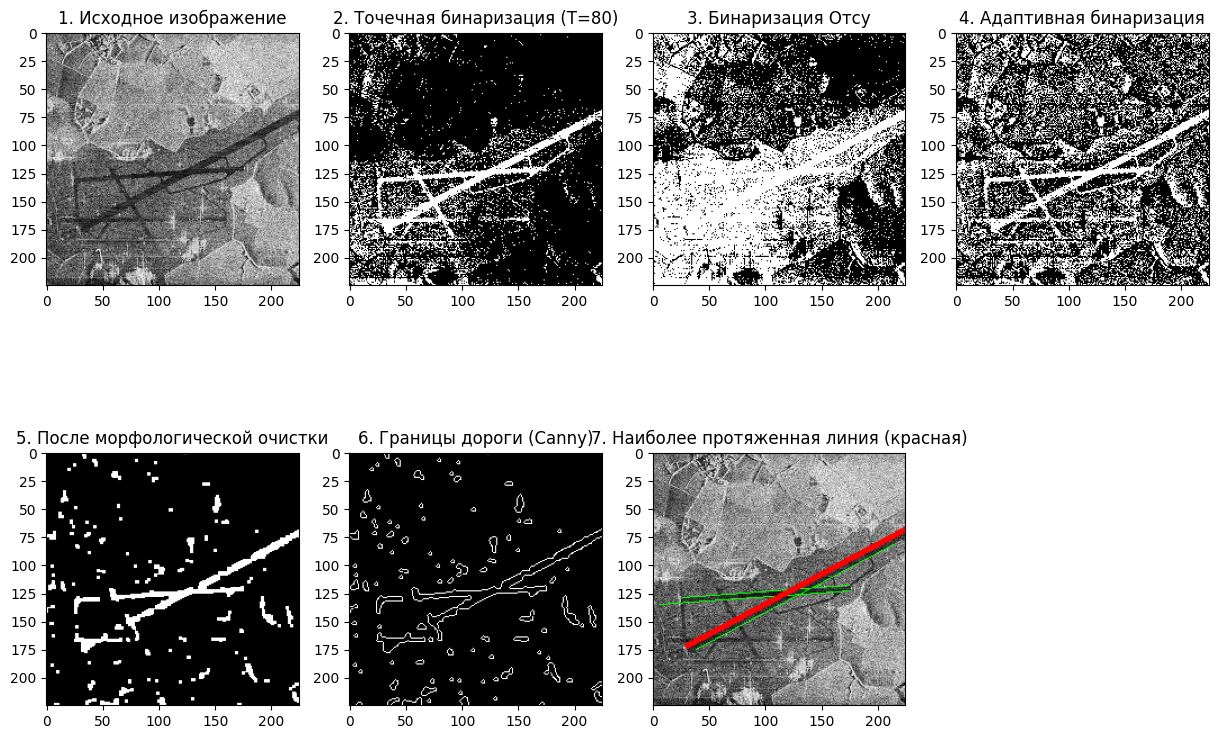

In [97]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# Загрузка изображения
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 10))

# === ЗАДАНИЕ 2: Исследование алгоритмов бинаризации ===
plt.subplot(2, 4, 1)
plt.imshow(image_gray, cmap="gray")
plt.title("1. Исходное изображение")

# 1. Точечная бинаризация (ручной порог)
_, th1 = cv2.threshold(image_gray, 80, 255, cv2.THRESH_BINARY_INV)  # Дорога темная - инвертируем
plt.subplot(2, 4, 2)
plt.imshow(th1, cmap="gray")
plt.title("2. Точечная бинаризация (T=80)")

# 2. Бинаризация Отсу
_, th2 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.subplot(2, 4, 3)
plt.imshow(th2, cmap="gray")
plt.title("3. Бинаризация Отсу")

# 3. Адаптивная бинаризация
th3 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY_INV, 51, 10)  # Инвертируем для темной дороги
plt.subplot(2, 4, 4)
plt.imshow(th3, cmap="gray")
plt.title("4. Адаптивная бинаризация")

# === Выбор лучшего метода и очистка ===
# На основе анализа: дорога в диапазоне 40-80, используем адаптивную бинаризацию
road_binary = th3.copy()

# Морфологические операции для очистки
kernel = np.ones((3, 3), np.uint8)
road_clean = cv2.morphologyEx(road_binary, cv2.MORPH_OPEN, kernel)  # Удаляем шум
road_clean = cv2.morphologyEx(road_clean, cv2.MORPH_CLOSE, kernel)  # Соединяем разрывы

plt.subplot(2, 4, 5)
plt.imshow(road_clean, cmap="gray")
plt.title("5. После морфологической очистки")

# === ЗАДАНИЕ 1: Поиск наиболее протяженного участка ===
# Поиск границ дороги
edges = cv2.Canny(road_clean, 50, 150)

plt.subplot(2, 4, 6)
plt.imshow(edges, cmap="gray")
plt.title("6. Границы дороги (Canny)")

# Преобразование Хафа для поиска линий
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=20)

# Визуализация результата
image_result = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
longest_line = None
max_length = 0

if lines is not None:
    # Находим самую длинную линию
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        
        if length > max_length:
            max_length = length
            longest_line = line
        
        # Рисуем все линии (зеленым)
        cv2.line(image_result, (x1, y1), (x2, y2), (0, 255, 0), 1)
    
    # Рисуем самую длинную линию (красным)
    if longest_line is not None:
        x1, y1, x2, y2 = longest_line[0]
        cv2.line(image_result, (x1, y1), (x2, y2), (0, 0, 255), 3)

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))
plt.title("7. Наиболее протяженная линия (красная)")

# === Анализ результатов ===
print("=== РЕЗУЛЬТАТЫ АНАЛИЗА ===")
print(f"Найдено линий: {len(lines) if lines is not None else 0}")
print(f"Длина самой протяженной линии: {max_length:.1f} пикселей")
print(f"Размер изображения: {image_gray.shape[1]}x{image_gray.shape[0]}")

# Сравнение методов бинаризации
print("\n=== СРАВНЕНИЕ МЕТОДОВ БИНАРИЗАЦИИ ===")
methods = {
    "Точечная (T=80)": th1,
    "Метод Отсу": th2, 
    "Адаптивная": th3
}

for name, binary_img in methods.items():
    road_pixels = np.sum(binary_img > 0)
    total_pixels = binary_img.size
    percentage = (road_pixels / total_pixels) * 100
    print(f"{name}: {percentage:.1f}% пикселей дороги")

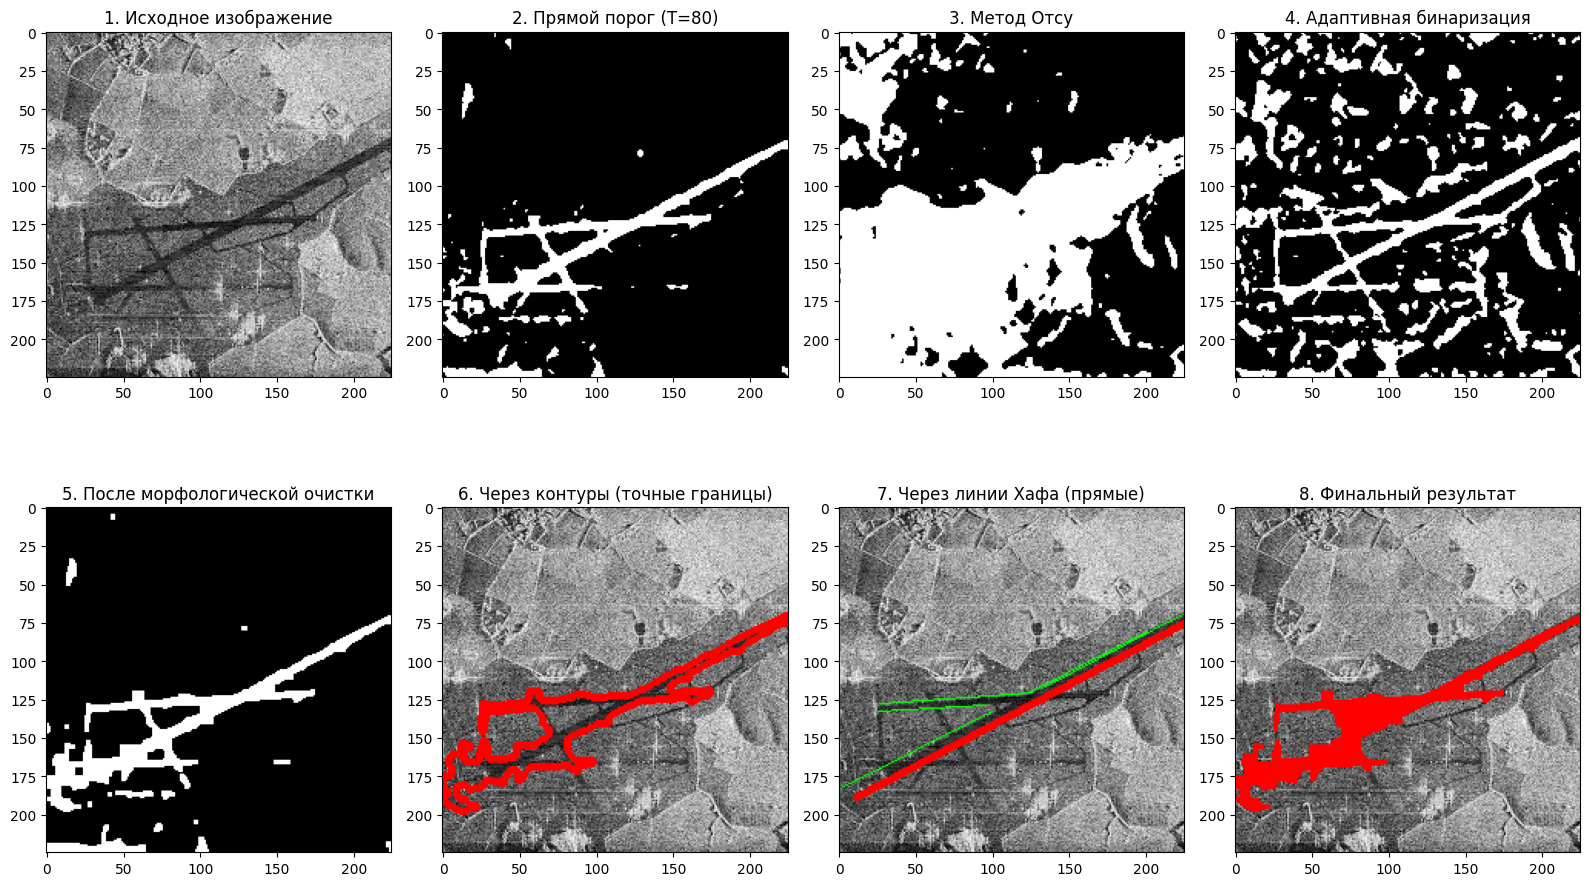

=== СРАВНЕНИЕ МЕТОДОВ ===
Длина самого длинного контура: 933.0 пикселей
Длина самой длинной линии Хафа: 241.1 пикселей

=== АНАЛИЗ КОНТУРОВ ДОРОГИ ===
Всего контуров: 17
Топ-5 самых длинных контуров:
1. Длина: 933.0, Площадь: 3777.0
2. Длина: 164.6, Площадь: 325.0
3. Длина: 45.3, Площадь: 64.0
4. Длина: 39.9, Площадь: 68.5
5. Длина: 28.1, Площадь: 45.5


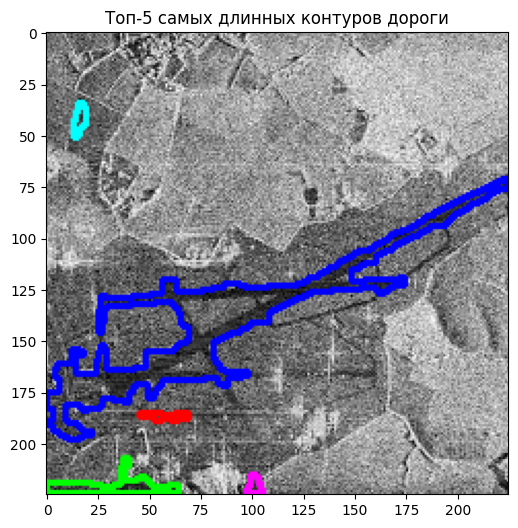

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('sar_3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 10))

# === ЗАДАНИЕ 2: Исследование алгоритмов бинаризации ===

# 1. Размытие для подавления шума (ваше улучшение)
blur = cv2.GaussianBlur(gray, (7,7), 0)

plt.subplot(2, 4, 1)
plt.imshow(gray, cmap="gray")
plt.title("1. Исходное изображение")

# 2. Сравнение разных методов бинаризации
# Метод 1: Прямой порог (ваш подход)
_, binary_direct = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV)

plt.subplot(2, 4, 2)
plt.imshow(binary_direct, cmap="gray")
plt.title("2. Прямой порог (T=80)")

# Метод 2: Отсу
_, binary_otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.subplot(2, 4, 3)
plt.imshow(binary_otsu, cmap="gray")
plt.title("3. Метод Отсу")

# Метод 3: Адаптивная бинаризация
binary_adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY_INV, 51, 10)

plt.subplot(2, 4, 4)
plt.imshow(binary_adaptive, cmap="gray")
plt.title("4. Адаптивная бинаризация")

# 3. Выбираем лучший метод и применяем морфологию (ваш подход)
binary = binary_direct.copy()  # Используем прямой порог, так как он лучше для известного диапазона

# Морфология: закрытие разрывов + удаление шума
kernel = np.ones((3,3), np.uint8)
binary_clean = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
binary_clean = cv2.morphologyEx(binary_clean, cv2.MORPH_OPEN, kernel, iterations=1)

plt.subplot(2, 4, 5)
plt.imshow(binary_clean, cmap="gray")
plt.title("5. После морфологической очистки")

# === ЗАДАНИЕ 1: Поиск наиболее протяженного участка ===

# Вариант 1: Через контуры (более точные границы)
contours, _ = cv2.findContours(binary_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Находим самый длинный контур
max_contour_length = 0
longest_contour = None

for cnt in contours:
    length = cv2.arcLength(cnt, False)
    if length > max_contour_length:
        max_contour_length = length
        longest_contour = cnt

# Визуализация через контуры
image_contour = image.copy()
if longest_contour is not None:
    cv2.drawContours(image_contour, [longest_contour], -1, (0, 0, 255), 3)

plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(image_contour, cv2.COLOR_BGR2RGB))
plt.title("6. Через контуры (точные границы)")

# Вариант 2: Через линии Хафа (прямые участки)
edges = cv2.Canny(binary_clean, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=20)

image_lines = image.copy()
max_line_length = 0
longest_line = None

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if length > max_line_length:
            max_line_length = length
            longest_line = line
        cv2.line(image_lines, (x1, y1), (x2, y2), (0, 255, 0), 1)
    
    if longest_line is not None:
        x1, y1, x2, y2 = longest_line[0]
        cv2.line(image_lines, (x1, y1), (x2, y2), (0, 0, 255), 3)

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(image_lines, cv2.COLOR_BGR2RGB))
plt.title("7. Через линии Хафа (прямые)")

# === ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: Объединенный подход ===

# Создаем маску самого длинного контура (самый точный метод)
road_mask = np.zeros_like(gray)
if longest_contour is not None:
    cv2.drawContours(road_mask, [longest_contour], -1, 255, -1)

# Наложение на исходное изображение
image_final = image.copy()
image_final[road_mask > 0] = [0, 0, 255]  # Дорога красным

plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(image_final, cv2.COLOR_BGR2RGB))
plt.title("8. Финальный результат")

plt.tight_layout()
plt.show()

# === СРАВНИТЕЛЬНЫЙ АНАЛИЗ ===
print("=== СРАВНЕНИЕ МЕТОДОВ ===")
print(f"Длина самого длинного контура: {max_contour_length:.1f} пикселей")
print(f"Длина самой длинной линии Хафа: {max_line_length:.1f} пикселей")

# Анализ контуров
print(f"\n=== АНАЛИЗ КОНТУРОВ ДОРОГИ ===")
print(f"Всего контуров: {len(contours)}")

# Сортируем контуры по длине
contour_lengths = []
for i, cnt in enumerate(contours):
    length = cv2.arcLength(cnt, False)
    area = cv2.contourArea(cnt)
    contour_lengths.append((length, area, i))

# Сортируем по убыванию длины
contour_lengths.sort(reverse=True)

print("Топ-5 самых длинных контуров:")
for i, (length, area, idx) in enumerate(contour_lengths[:5]):
    print(f"{i+1}. Длина: {length:.1f}, Площадь: {area:.1f}")

# === ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ: Все крупные контуры ===
image_all_contours = image.copy()
for i, (length, area, idx) in enumerate(contour_lengths[:5]):
    color = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)][i]
    cv2.drawContours(image_all_contours, [contours[idx]], -1, color, 2)

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(image_all_contours, cv2.COLOR_BGR2RGB))
plt.title("Топ-5 самых длинных контуров дороги")
plt.show()